<a href="https://colab.research.google.com/github/MelisaYasak/gradiant_descent/blob/main/Proje_1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/ml ödevi')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Data Processing

In [6]:
# upload data
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
#feature1
x1 = df["sqft_living"]
x1

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [8]:
# feature2
x2 = df["sqft_lot"]
x2

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64

In [9]:
# concat two feature for X
frames = [x1, x2]
X = pd.concat(frames, axis=1)
X

,sqft_living,sqft_lot
0,1180,5650
1,2570,7242
2,770,10000
3,1960,5000
4,1680,8080
...,...,...
21608,1530,1131
21609,2310,5813
21610,1020,1350
21611,1600,2388


In [10]:
# y
y = df["price"]


In [11]:
# Normalize features
X = (X - X.min()) / (X.max()-X.min())
print(X)

       sqft_living  sqft_lot
0         0.067170  0.003108
1         0.172075  0.004072
2         0.036226  0.005743
3         0.126038  0.002714
4         0.104906  0.004579
...            ...       ...
21608     0.093585  0.000370
21609     0.152453  0.003206
21610     0.055094  0.000503
21611     0.098868  0.001132
21612     0.055094  0.000337

[21613 rows x 2 columns]


In [12]:
# numpy ones array for theta0
#np.ones(X.shape[0])

In [13]:
# Add a 1 column theta0
X = np.c_[np.ones(X.shape[0]), X]
X

array([[1.00000000e+00, 6.71698113e-02, 3.10751079e-03],
       [1.00000000e+00, 1.72075472e-01, 4.07186891e-03],
       [1.00000000e+00, 3.62264151e-02, 5.74253455e-03],
       ...,
       [1.00000000e+00, 5.50943396e-02, 5.02774650e-04],
       [1.00000000e+00, 9.88679245e-02, 1.13154584e-03],
       [1.00000000e+00, 5.50943396e-02, 3.36798440e-04]])

In [14]:
#7. ve8. satırlardan dolşayı id hatası
'''
import math
s_f=0.33
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])
'''

'\nimport math\ns_f=0.33\nn_train = math.floor(s_f * X.shape[0])\nn_test = math.ceil((1-s_f) * X.shape[0])\nX_train = X[:n_train]\ny_train = y[:n_train]\nX_test = X[n_train:]\ny_test = y[n_train:]\nprint("Total Number of rows in train:",X_train.shape[0])\nprint("Total Number of rows in test:",X_test.shape[0])\n'

In [15]:
# for split train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
print(y_train)
print(y_test)

16197    840000.0
16993    302000.0
17538    425000.0
5761     215000.0
18921    565000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 14480, dtype: float64
735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
15257     250000.0
13822     447500.0
18411     630000.0
20188     602000.0
13030     320000.0
Name: price, Length: 7133, dtype: float64


#Functions

In [17]:
def cost_function(X, y, theta):
  m = len(y)
  hypothesis = X.dot(theta)
  error = hypothesis-y
  j = (1 / 2 * m) * np.sum(np.square(error))
  return j

In [18]:
def gradient_descent(X, y, theta, alpha, iters):
  cost = np.zeros(iters)
  thetas = np.zeros((iters,3))
  m = len(y)
  for i in range(iters):
    cost[i] = cost_function(X, y, theta)
    error = X.dot(theta)-y
    theta = theta - (1/m) *alpha*np.dot(X.T, error)   
    thetas[i,:] =theta.T
    print(theta, i)
  return cost, thetas

In [19]:
def plotChart(iterations, cost_num, xlabel, ylabel, title):
  fig, ax = plt.subplots()
  ax.plot(np.arange(iterations), cost_num, 'r')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  plt.savefig(title)
  plt.show()

# TRAIN

## Alpha 0.01, iter 14480 theta 0 (theta1)

In [37]:
alpha = 0.01
iterations = 14480
theta1 = np.zeros(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[ 357456.91999183 1345153.45091223   55720.720124  ] 9480
[ 357442.40635682 1345260.40692198   55724.27261959] 9481
[ 357427.89339552 1345367.35797757   55727.82478656] 9482
[ 357413.38110791 1345474.30407925   55731.37662493] 9483
[ 357398.86949395 1345581.24522723   55734.92813472] 9484
[ 357384.35855361 1345688.18142176   55738.47931593] 9485
[ 357369.84828686 1345795.11266306   55742.0301686 ] 9486
[ 357355.33869367 1345902.03895136   55745.58069274] 9487
[ 357340.82977401 1346008.96028689   55749.13088835] 9488
[ 357326.32152784 1346115.87666988   55752.68075546] 9489
[ 357311.81395514 1346222.78810056   55756.23029409] 9490
[ 357297.30705588 1346329.69457917   55759.77950425] 9491
[ 357282.80083002 1346436.59610592   55763.32838595] 9492
[ 357268.29527753 1346543.49268106   55766.87693921] 9493
[ 357253.79039838 1346650.3843048    55770.42516406] 9494
[ 357239.28619254 1346757.27097738   55773.97306049] 9495
[ 357224.78265997 1346864

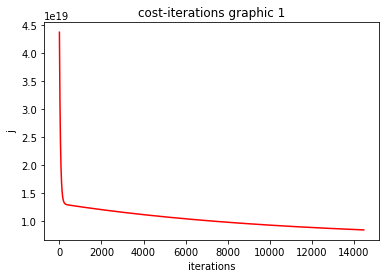

With final theta values of [ 292704.85539679 1822456.55591667   69692.20095009]


In [38]:
initial_cost = cost_function(X_train, y_train, theta1)
print(X)
print(theta1)
print('With initial theta values of {0}'.format(theta1))
cost1, thetas1 = gradient_descent(X_train, y_train, theta1, alpha, iterations)
plotChart(iterations, cost1, 'iterations', 'j', 'cost-iterations graphic 1')
final_cost = cost_function(X_train, y_train, thetas1[-1])
print('With final theta values of {0}'.format(thetas1[-1]))

In [39]:
cost_function(X_train, y_train, thetas1[-1]) 

8.403477840092532e+18

## Alpha 0.3, iter 14480 theta 0 (theta2)

In [40]:
alpha = 0.3
iterations = 14480
theta2 = np.zeros(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[  44499.8562129  3682536.50670041 -343609.24449149] 9480
[  44499.83594731 3682538.33924053 -343635.00300398] 9481
[  44499.81568664 3682540.17146143 -343660.75718639] 9482
[  44499.79543088 3682542.00336319 -343686.50703944] 9483
[  44499.77518003 3682543.83494588 -343712.25256387] 9484
[  44499.75493409 3682545.66620957 -343737.99376039] 9485
[  44499.73469306 3682547.49715432 -343763.73062973] 9486
[  44499.71445693 3682549.3277802  -343789.46317263] 9487
[  44499.6942257  3682551.15808729 -343815.1913898 ] 9488
[  44499.67399936 3682552.98807565 -343840.91528198] 9489
[  44499.65377792 3682554.81774535 -343866.63484989] 9490
[  44499.63356137 3682556.64709646 -343892.35009425] 9491
[  44499.61334971 3682558.47612905 -343918.06101579] 9492
[  44499.59314293 3682560.30484318 -343943.76761524] 9493
[  44499.57294104 3682562.13323893 -343969.46989333] 9494
[  44499.55274402 3682563.96131637 -343995.16785077] 9495
[  44499.53255189 3682565

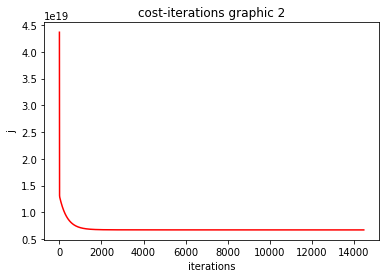

With final theta values of [  44434.61369091 3688709.00821171 -430712.14691897]


In [41]:
initial_cost = cost_function(X_train, y_train, theta2)
print(X)
print(theta2)
print('With initial theta values of {0}'.format(theta2))
cost2, thetas2 = gradient_descent(X_train, y_train, theta2, alpha, iterations)
plotChart(iterations, cost2, 'iterations', 'j', 'cost-iterations graphic 2')
final_cost = cost_function(X_train, y_train, thetas2[-1])
print('With final theta values of {0}'.format(thetas2[-1]))

In [42]:
cost_function(X_train, y_train, thetas2[-1]) 

6.721929192606562e+18

## Alpha 0.01 iter 14480 theta rand (theta3)

In [43]:
alpha = 0.01
iterations = 14480
theta3= np.random.randn(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[ 357456.92627726 1345153.25344088   55723.03215866] 9480
[ 357442.41264203 1345260.2094531    55726.58464138] 9481
[ 357427.89968051 1345367.16051117   55730.13679549] 9482
[ 357413.38739267 1345474.10661533   55733.688621  ] 9483
[ 357398.87577849 1345581.0477658    55737.24011793] 9484
[ 357384.36483792 1345687.9839628    55740.79128629] 9485
[ 357369.85457095 1345794.91520658   55744.3421261 ] 9486
[ 357355.34497754 1345901.84149736   55747.89263737] 9487
[ 357340.83605766 1346008.76283537   55751.44282013] 9488
[ 357326.32781127 1346115.67922084   55754.99267438] 9489
[ 357311.82023835 1346222.59065401   55758.54220014] 9490
[ 357297.31333886 1346329.49713509   55762.09139744] 9491
[ 357282.80711278 1346436.39866432   55765.64026628] 9492
[ 357268.30156007 1346543.29524193   55769.18880669] 9493
[ 357253.7966807  1346650.18686816   55772.73701867] 9494
[ 357239.29247463 1346757.07354322   55776.28490225] 9495
[ 357224.78894185 1346863

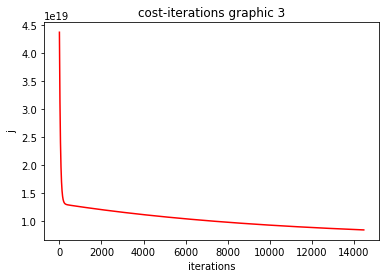

With final theta values of [ 292704.86068727 1822456.36993861   69694.44953609]


In [44]:
print(X)
print(theta3)
print('With initial theta values of {0}'.format(theta3))

# Run Gradient Descent
cost3, thetas3 = gradient_descent(X_train, y_train, theta3, alpha, iterations)
# Display cost chart
plotChart(iterations, cost3, 'iterations', 'j', 'cost-iterations graphic 3')

print('With final theta values of {0}'.format(thetas3[-1]))



In [45]:
cost_function(X_train, y_train, thetas3[-1]) 

8.403478073383021e+18

##Alpha 0.3 iter 14480 theta rand (theta4)

In [46]:
alpha = 0.3
iterations = 14480
theta4= np.random.randn(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[  44499.85640135 3682536.48863321 -343608.9892526 ] 9480
[  44499.83613573 3682538.32117636 -343634.747808  ] 9481
[  44499.81587502 3682540.1534003  -343660.50203332] 9482
[  44499.79561923 3682541.9853051  -343686.25192927] 9483
[  44499.77536835 3682543.81689082 -343711.99749659] 9484
[  44499.75512238 3682545.64815754 -343737.73873599] 9485
[  44499.73488132 3682547.47910533 -343763.47564822] 9486
[  44499.71464516 3682549.30973424 -343789.20823398] 9487
[  44499.69441389 3682551.14004436 -343814.93649402] 9488
[  44499.67418753 3682552.97003576 -343840.66042905] 9489
[  44499.65396606 3682554.79970849 -343866.38003981] 9490
[  44499.63374947 3682556.62906263 -343892.09532701] 9491
[  44499.61353778 3682558.45809825 -343917.80629139] 9492
[  44499.59333097 3682560.28681541 -343943.51293367] 9493
[  44499.57312905 3682562.1152142  -343969.21525458] 9494
[  44499.552932   3682563.94329466 -343994.91325483] 9495
[  44499.53273983 3682565

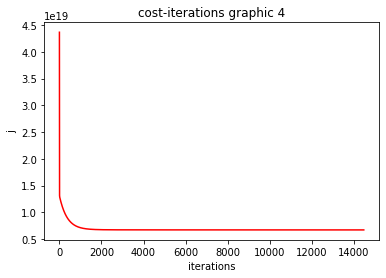

With final theta values of [  44434.61377228 3688709.00041591 -430712.03679249]


In [47]:
print(X)
print(theta4)
print('With initial theta values of {0}'.format(theta4))

# Run Gradient Descent
cost4, thetas4 = gradient_descent(X_train, y_train, theta4, alpha, iterations)
# Display cost chart
plotChart(iterations, cost4, 'iterations', 'j', 'cost-iterations graphic 4')


print('With final theta values of {0}'.format(thetas4[-1]))



In [48]:
cost_function(X_train, y_train, thetas4[-1]) 

6.72192919346628e+18

## Alpha 0.01, iter 150 theta 0 (theta5)

In [50]:
alpha = 0.01
iterations = 150
theta5 = np.zeros(X.shape[1])

[[1.00000000e+00 6.71698113e-02 3.10751079e-03]
 [1.00000000e+00 1.72075472e-01 4.07186891e-03]
 [1.00000000e+00 3.62264151e-02 5.74253455e-03]
 ...
 [1.00000000e+00 5.50943396e-02 5.02774650e-04]
 [1.00000000e+00 9.88679245e-02 1.13154584e-03]
 [1.00000000e+00 5.50943396e-02 3.36798440e-04]]
[0. 0. 0.]
With initial theta values of [0. 0. 0.]
[5377.89045718  897.19834695   55.28912808] 0
[10700.78794428  1786.94262338   110.09124305] 1
[15969.25248007  2669.30865813   164.411299  ] 2
[21183.83838054  3544.37150782   218.25419959] 3
[26345.0943169   4412.20546478   271.62479853] 4
[31453.5633731   5272.88406478   324.52790012] 5
[36509.78310272  6126.48009479   376.96825971] 6
[41514.2855853   6973.06560055   428.95058425] 7
[46467.59748205  7812.71189414   480.47953274] 8
[51370.24009106  8645.48956148   531.55971677] 9
[56222.7294019   9471.46846968   582.19570092] 10
[61025.57614968 10290.71777437   632.39200332] 11
[65779.28586854 11103.30592696   682.1530961 ] 12
[70484.35894466 11

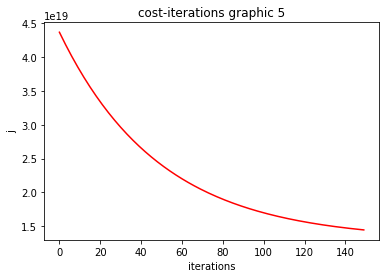

With final theta values of [412730.03085015  81149.74607455   4802.43474905]


In [51]:
initial_cost = cost_function(X_train, y_train, theta5)
print(X)
print(theta5)
print('With initial theta values of {0}'.format(theta5))
cost5, thetas5 = gradient_descent(X_train, y_train, theta5, alpha, iterations)
plotChart(iterations, cost5, 'iterations', 'j', 'cost-iterations graphic 5')
final_cost = cost_function(X_train, y_train, thetas5[-1])
print('With final theta values of {0}'.format(thetas5[-1]))

In [52]:
cost_function(X_train, y_train, thetas5[-1]) 

1.4428771342036615e+19

## Alpha 0.3, iter 150 theta 0 (theta6)

In [53]:
alpha = 0.3
iterations = 150
theta6 = np.zeros(X.shape[1])

[[1.00000000e+00 6.71698113e-02 3.10751079e-03]
 [1.00000000e+00 1.72075472e-01 4.07186891e-03]
 [1.00000000e+00 3.62264151e-02 5.74253455e-03]
 ...
 [1.00000000e+00 5.50943396e-02 5.02774650e-04]
 [1.00000000e+00 9.88679245e-02 1.13154584e-03]
 [1.00000000e+00 5.50943396e-02 3.36798440e-04]]
[0. 0. 0.]
With initial theta values of [0. 0. 0.]
[161336.71371547  26915.9504084    1658.67384248] 0
[273179.75435152  47123.23735756   2879.03588194] 1
[350649.62925138  62669.23895909   3794.84680546] 2
[404247.55973806  74975.8662207    4499.00387683] 3
[441266.66402103  85030.64202738   5056.02463267] 4
[466772.0264661   93519.40586498   5510.71683367] 5
[484281.35760721 100918.47750856   5894.19976256] 6
[496237.71384681 107558.66488299   6228.08602724] 7
[504337.80220601 113669.71764642   6527.3858312 ] 8
[509759.98861137 119411.20029044   6802.52399496] 9
[513322.65009289 124893.93356806   7060.74078133] 10
[515594.15069324 130194.88560709   7307.06477138] 11
[516969.21995021 135367.51381

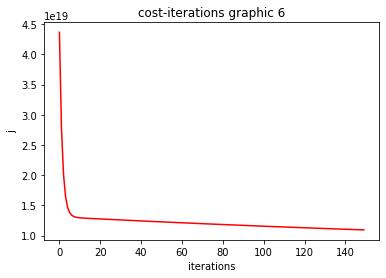

With final theta values of [438736.83941365 746317.51628174  33622.08270123]


In [55]:
initial_cost = cost_function(X_train, y_train, theta6)
print(X)
print(theta6)
print('With initial theta values of {0}'.format(theta6))
cost6, thetas6 = gradient_descent(X_train, y_train, theta6, alpha, iterations)
plotChart(iterations, cost6, 'iterations', 'j', 'cost-iterations graphic 6')
print('With final theta values of {0}'.format(thetas6[-1]))

In [56]:
cost_function(X_train, y_train, thetas6[-1]) 

1.0928866118924304e+19

#Test

##theta6

In [57]:
thetas6[-1]

array([438736.83941365, 746317.51628174,  33622.08270123])

In [58]:
X_test[0]

array([1.        , 0.13433962, 0.00507197])

In [59]:
y_test[0]

221900.0

In [60]:
predict = X_test[0].dot(thetas6[-1])
predict

539167.3829966749

In [61]:
predictAll = X_test.dot(thetas6[-1])
dfpredict = pd.DataFrame(predictAll)
dfpredict

,0
0,539167.382997
1,585873.785640
2,634962.061809
3,679535.145690
4,566132.161578
...,...
7128,513210.791106
7129,553373.713583
7130,513178.204444
7131,504655.334812


In [62]:
errorAll = predictAll-y_test
errorAll

735      174167.382997
2830    -279126.214360
4106    -403037.938191
16218   -810464.854310
19964   -144867.838422
             ...      
15257    263210.791106
13822    105873.713583
18411   -116821.795556
20188    -97344.665188
13030    172974.951530
Name: price, Length: 7133, dtype: float64